# T Test

T-Test (Uji-t) adalah salah satu uji statistik inferensial yang paling sering digunakan dalam analisis data. Ini membantu kita menentukan apakah ada perbedaan signifikan antara rata-rata (mean) dua kelompok atau antara rata-rata satu kelompok dengan nilai tertentu.

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import ttest_1samp # one t test
from scipy.stats import ttest_ind # two t test
from scipy.stats import ttest_rel # paired t test

In [2]:
data = pd.read_csv('train.csv')

data.shape

(1460, 81)

In [3]:
pd.set_option('display.max_columns', 81)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# One-Sample T-Test

- Tujuan: Membandingkan rata-rata sampel tunggal dengan nilai hipotesis atau nilai populasi yang diketahui.
- Contoh:
    - Apakah rata-rata tinggi badan siswa di sekolah A berbeda secara signifikan dari rata-rata tinggi badan nasional (misalnya, 160 cm)?
    - Apakah rata-rata penjualan bulanan tim baru lebih tinggi dari target penjualan yang ditetapkan (misalnya, 100 unit)?

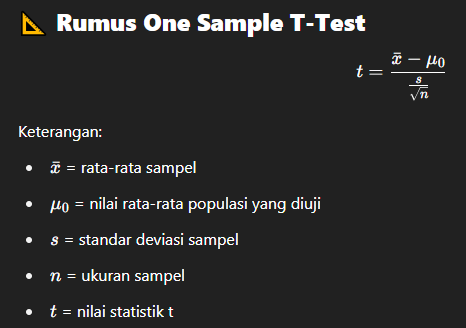

In [4]:
# One sample T Test
tset, pval = ttest_1samp(data['SalePrice'], 180000)
print("p-values", pval)

# alpha value is 0.05 or 5%
if pval < 0.05:
    print("we are rejecting null hypothesis")
else:
    print("we are accpeting null hypothesis")

p-values 0.6577784607522807
we are accpeting null hypothesis


In [5]:
data['SalePrice'].mean()

np.float64(180921.19589041095)

# Independent Two-Sample T-Test

- Tujuan: Membandingkan rata-rata dari dua kelompok yang tidak saling terkait atau independen satu sama lain. Subjek di satu kelompok sama sekali tidak berhubungan dengan subjek di kelompok lain.
- Contoh:
    - Apakah ada perbedaan signifikan dalam skor ujian antara siswa yang diajar dengan Metode A dan siswa yang diajar dengan Metode B?
    - Apakah tingkat kepuasan pelanggan berbeda antara pengguna produk X dan produk Y?
    - Apakah ada perbedaan gaji rata-rata antara pria dan wanita di suatu perusahaan?

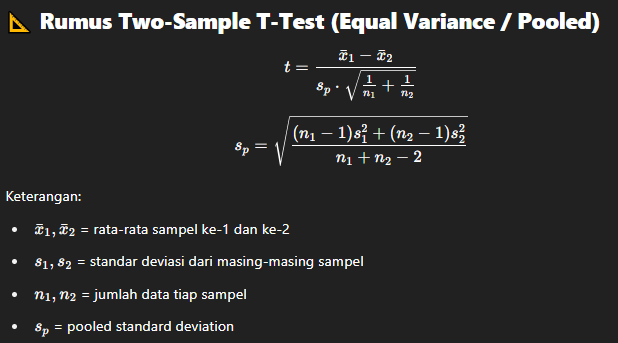

Mari kita ambil contoh untuk Uji-T Dua Sampel: Misalkan kita ingin memeriksa apakah ada hubungan antara Harga Lantai Pertama per Kaki Persegi dan Harga Lantai Kedua per Kaki Persegi

In [7]:
# Two Sample t test
ttest, pval = ttest_ind(data['1stFlrSF'], data['2ndFlrSF'])
print("p-value", pval)

if pval < 0.05:
    print("we are rejecting null hypothesis")
else:
    print("we are accpeting null hypothesis")

p-value 0.0
we are rejecting null hypothesis


# Paired T-Test

- Tujuan: Membandingkan rata-rata dari dua pengukuran yang berpasangan atau terkait pada subjek yang sama. Ini sering digunakan dalam desain "sebelum dan sesudah" atau ketika ada hubungan alami antar pasangan data.
- Contoh:
    - Apakah ada perbedaan signifikan dalam tekanan darah seseorang sebelum dan sesudah minum obat tertentu?
    - Apakah ada peningkatan kinerja karyawan setelah mengikuti pelatihan dibandingkan sebelum pelatihan?
    - Apakah ada perbedaan dalam waktu respons seorang atlet sebelum dan sesudah menggunakan suplemen tertentu?

In [9]:
# Tow-sample paired t-test

# The control list represents the control group data
control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]

# The treatment list represents the treatment group data
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

# Perform a paired t-test to compare the mean of the control and treatment groups
ttest, pval = ttest_rel(control, treatment)

# Display the calculates p-value
print('P Value: ', pval)

# Check if the p-value is less than 0.05 indicating statistical significance
if pval < 0.05:
    print("we are rejecting null hypothesis")
else:
    print("we are accpeting null hypothesis")

P Value:  0.0055329408161001415
we are rejecting null hypothesis
